# Mini Project 01

### Importing Necessory Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset fetched
Here we can see that that are 1850 rows × 8 columns.

In [5]:
df = pd.read_csv("university_enrollment_(Mini-project-01).csv")
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


## Data Cleaning
Data Cleaning is the crucial part of the the Data Analysis, with dirty data, we might not be able to see into the insights of the dataset. So let's see the data cleaning, is there any nan values or not

this shows that, we have null/nan values in our dataset which is not good, while in training the model with this dataset, our model will not be able to predict the good prediction with this data so we have to clean the data.

In [8]:
null_values = df.isna().sum()
null_values = null_values.to_frame("Null values")
print("Here we can see the Null values in every Columns:")
null_values

Here we can see the Null values in every Columns:


,Null values
course_id,0
course_type,0
year,0
enrollment_count,0
pre_score,0
post_score,185
pre_requirement,891
department,0


Let's fill the nan values with the before value in the dataset. bfill, will fill the nan value which is before that values.
this will clean our data, now if we'll see the nan values we'll find 0 everywhere, becaues the nan values is filled

In [10]:
df = df.bfill()
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,Beginner,Science
2,3,online,2016,257,57.24,80.0,Beginner,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [11]:
null_values = df.isna().sum()
null_values = null_values.to_frame("Null values")
print("Here we can see the Null values in every Columns:")
null_values

Here we can see the Null values in every Columns:


,Null values
course_id,0
course_type,0
year,0
enrollment_count,0
pre_score,0
post_score,0
pre_requirement,4
department,0


## Data Preprocessing

In data preprocessin, we do process the data, so look into it, looking into the features, what will make it better, looking for better data types

To find the *enrollment_count_rate*, lets divide the total count of the enrollment to the desire enrollment, let's do it by code
It'll tell us the enrollment rate of each year. which will help us to look into the insights of the dataset

In [15]:
df['enrollment_rate'] = df['enrollment_count'] / df['enrollment_count'].sum()
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department,enrollment_rate
0,1,classroom,2018,165,28.14,73.0,Beginner,Science,0.000385
1,2,classroom,2020,175,79.68,86.0,Beginner,Science,0.000409
2,3,online,2016,257,57.24,80.0,Beginner,Mathematics,0.000600
3,4,online,2013,251,97.67,75.0,Beginner,Technology,0.000586
4,5,classroom,2019,165,39.75,76.0,Beginner,Science,0.000385


## Data Analysis

Let's see the counts of the values, like course_type, department, pre-requirement. it'll give you the analysis data, so you can do analysis just by looking on it.
here we can see the total online courses and classroom course that held. and other counts

In [18]:
columns_name = ["course_type", "pre_requirement", "department"]
for i in columns_name:
    total_count = df[i].value_counts()
    print(f"\t\t\t\t\t\tHere are the Value Counts for the {i}:\n\t\t\t\t------------------------------------------------------------------------------\n{total_count}")

						Here are the Value Counts for the course_type:
				------------------------------------------------------------------------------
course_type
online       1375
classroom     475
Name: count, dtype: int64
						Here are the Value Counts for the pre_requirement:
				------------------------------------------------------------------------------
pre_requirement
Beginner        1270
Intermediate     576
Name: count, dtype: int64
						Here are the Value Counts for the department:
				------------------------------------------------------------------------------
department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64


From here, i'll show you the gorupby power, we can analyse the data that much with the help of it. Look for the below code line, it's grouped year with the enrollment_count, which will show you that the *in the year 2011 the total enrollment wasa 34109* and respectively for others

In [20]:
enrolments = df.groupby('year')["enrollment_count"].sum()
enrolments

year
2011    34109
2012    38463
2013    38897
2014    34344
2015    36910
2016    37507
2017    33550
2018    36477
2019    33485
2020    32696
2021    36840
2022    35118
Name: enrollment_count, dtype: int64

Look for the below code line, it's grouped year with the enrollment_count, which will show you that the *in the year 2011 the total enrollment was 109 for online and 39 for classroom* and respectively for others

In [22]:
enrolments = df.groupby('year')["course_type"].value_counts()
enrolments

year  course_type
2011  online         109
      classroom       39
2012  online         128
      classroom       36
2013  online         124
      classroom       45
2014  online         102
      classroom       50
2015  online         118
      classroom       42
2016  online         120
      classroom       42
2017  online         110
      classroom       33
2018  online         119
      classroom       37
2019  online         105
      classroom       42
2020  online         106
      classroom       34
2021  online         119
      classroom       40
2022  online         115
      classroom       35
Name: count, dtype: int64

Look for the below code line, it's grouped year with the enrollment_count, which will show you that the in the year *2011 the total enrollment was 47 for Tech Department, 44 for Science, 25 for Eng., 17 for Math, and 15 for Mathematics* for online and 39 for classroom and respectively for others

In [24]:
enrolments = df.groupby('year')["department"].value_counts()
enrolments

year  department 
2011  Technology     47
      Science        44
      Engineering    25
      Math           17
      Mathematics    15
2012  Technology     66
      Science        43
      Math           23
      Mathematics    18
      Engineering    14
2013  Technology     62
      Science        47
      Math           23
      Engineering    20
      Mathematics    17
2014  Technology     53
      Science        34
      Engineering    26
      Math           21
      Mathematics    18
2015  Technology     59
      Science        51
      Mathematics    19
      Engineering    18
      Math           13
2016  Technology     66
      Science        44
      Mathematics    21
      Math           18
      Engineering    13
2017  Technology     61
      Science        28
      Mathematics    20
      Engineering    19
      Math           15
2018  Technology     61
      Science        36
      Math           21
      Engineering    20
      Mathematics    18
2019  Technology     5

In [25]:
enrolments = df.groupby('year')[["course_type", "pre_requirement"]].value_counts()
enrolments

year  course_type  pre_requirement
2011  online       Beginner           75
                   Intermediate       33
      classroom    Beginner           26
                   Intermediate       13
2012  online       Beginner           93
                   Intermediate       35
      classroom    Intermediate       19
                   Beginner           17
2013  online       Beginner           91
                   Intermediate       32
      classroom    Beginner           23
                   Intermediate       22
2014  online       Beginner           74
                   Intermediate       28
      classroom    Beginner           26
                   Intermediate       24
2015  online       Beginner           86
                   Intermediate       32
      classroom    Beginner           23
                   Intermediate       19
2016  online       Beginner           91
                   Intermediate       28
      classroom    Beginner           26
                   Int

## Data Visulization

The below graph will show the visulaion of the analysis we did before

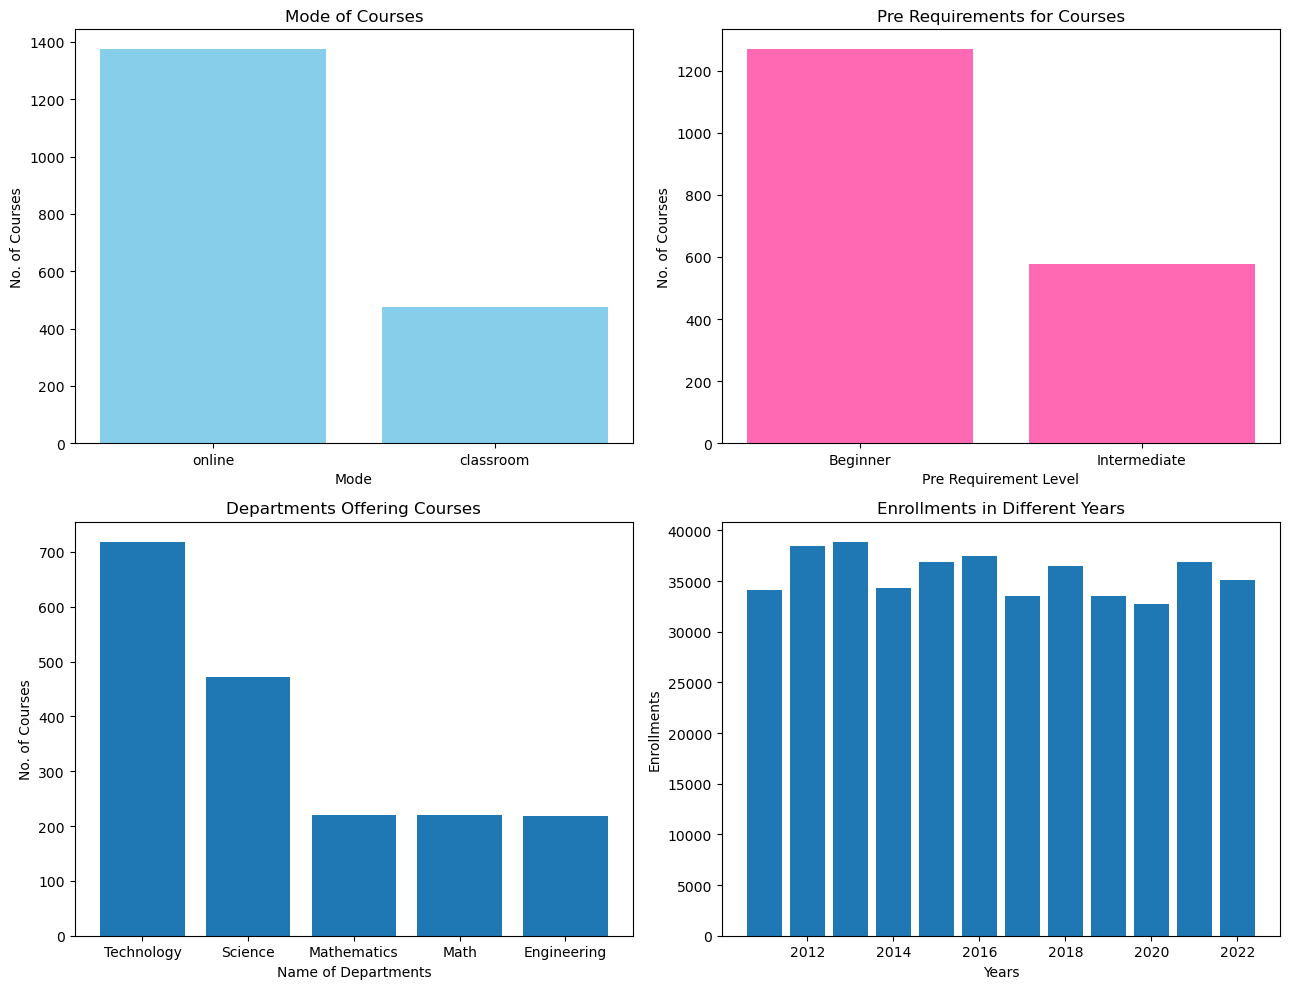

In [28]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0,0].bar(df["course_type"].value_counts().index, df["course_type"].value_counts().values, color = "skyblue")
ax[0,0].set_title("Mode of Courses")
ax[0,0].set_xlabel("Mode")
ax[0,0].set_ylabel("No. of Courses")

ax[0,1].bar(df["pre_requirement"].value_counts().index, df["pre_requirement"].value_counts().values, color = "hotpink")
ax[0,1].set_title("Pre Requirements for Courses")
ax[0,1].set_xlabel("Pre Requirement Level")
ax[0,1].set_ylabel("No. of Courses")

ax[1,0].bar(df["department"].value_counts().index, df["department"].value_counts().values)
ax[1,0].set_title("Departments Offering Courses")
ax[1,0].set_xlabel("Name of Departments")
ax[1,0].set_ylabel("No. of Courses")

total_enrolments = df.groupby('year')["enrollment_count"].sum()
ax[1,1].bar(total_enrolments.index, total_enrolments.values)
ax[1,1].set_title("Enrollments in Different Years")
ax[1,1].set_xlabel("Years")
ax[1,1].set_ylabel("Enrollments")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Enrollments')

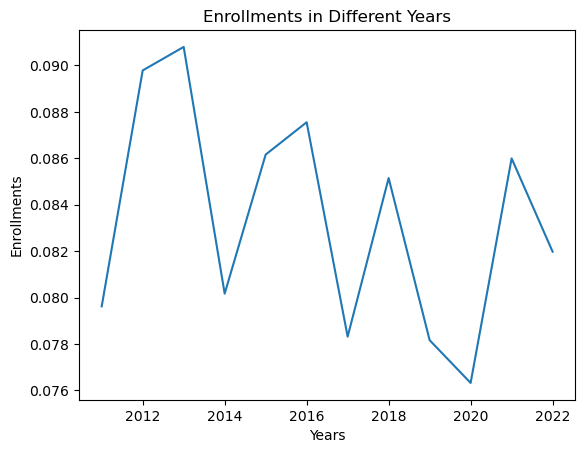

In [29]:
total_enrolments = df.groupby('year')["enrollment_rate"].sum()
plt.plot(total_enrolments.index, total_enrolments.values)
plt.title("Enrollments in Different Years")
plt.xlabel("Years")
plt.ylabel("Enrollments")

# Data Insights

# Enrollment Analysis Report

## Key Findings

* Online courses have higher enrollment rates compared to classroom courses
* Enrollment rates have increased over the years, with a significant jump in 2020
* Higher pre_score values are associated with higher post_score values
* Science and Mathematics departments have higher enrollment rates compared to Technology

## Conclusion

The course type (online) is a significant factor contributing to higher enrollment.

## Recommendations

* The university can consider expanding its online course offerings to reach a wider range of students.
* Additionally, the university can focus on improving the quality of courses with high enrollment rates, such as those in Science and Mathematics departments.
* Develop more online courses in high-demand subjects
* Analyze student feedback to improve course quality
* Monitor enrollment trends to adjust course offerings accordingly